the project of the image processing 

In [1]:
import cv2 as cv
import numpy as np
import json
import os
from PIL import Image, ImageEnhance
from skimage.filters import threshold_otsu
import skimage.io
import skimage.color
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score



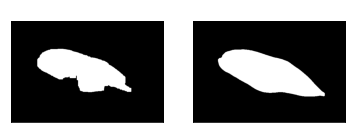

0.004729104040288886


In [2]:
    
# Reading The  First Folder
n1 = os.listdir('_Output/Alstonia_Scholaris_(P2)')
alpha = 1.9 # Simple contrast control
beta = 7  # Simple brightness control
kernel = np.ones((16,16),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(1):
    img = cv.imread('_Output/Alstonia_Scholaris_(P2)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################

    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.4
    binary_mask = blurred_image > t
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    final = cv.medianBlur(opening, 3)
    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('opening',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    
    plt.subplot(121), plt.imshow(final , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Alstonia_Scholaris_(P2)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Alstonia_Scholaris_(P2)\\'+str(i+1)+'.jpg';

    ###############################Out Put#############################
    
    cv.imwrite(writePath, opening)
    plt.show()


average=totaljaccard/len(n1)
print(average)

In [3]:
#Third Folder

# Reading The  third Folder
n1 = os.listdir('_Output/Basil_(P8)')
alpha = 1.9 # Simple contrast control
beta = 5  # Simple brightness control
kernel = np.ones((11,11),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 
totaljaccard=0

for i in range(len(n1)):
    img = cv.imread('_Output/Basil_(P8)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.3
    binary_mask = blurred_image > t
    t1= 0.4
    binary_mask=binary_mask < t1
    binary_mask=1-binary_mask

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better


    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    final = cv.medianBlur(opening, 3)
   

    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('opening',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(121), plt.imshow(final , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Basil_(P8)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    
    # print(iou)
    
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Basil_(P8)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()


average=totaljaccard/len(n1)
print(average)
    

0.9284325825030575


In [40]:
#Fourth Folder 


n1 = os.listdir('_Output/Pongamia_Pinnata_(P7)')
alpha = 1.9 # Simple contrast control
beta = 5  # Simple brightness control
kernel = np.ones((11,11),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(len(n1)):
    img = cv.imread('_Output/Pongamia_Pinnata_(P7)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.299
    binary_mask = blurred_image > t
    t1= 0.35
    binary_mask=binary_mask < t1
    binary_mask=1-binary_mask

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    final = cv.medianBlur(opening, 3)
   

    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('opening',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(121), plt.imshow(final , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Pongamia_Pinnata_(P7)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Pongamia_Pinnata_(P7)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()


average=totaljaccard/len(n1)
print(average)



0.7541729613059109


In [39]:
#fifth folder  



n1 = os.listdir('_Output/Chinar_(P11)')
alpha = 1.9 # Simple contrast control
beta = 5  # Simple brightness control
kernel = np.ones((11,11),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(len(n1)):
    img = cv.imread('_Output/Chinar_(P11)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.36
    binary_mask = blurred_image > t
    t1= 0.5
    binary_mask=binary_mask < t1
    binary_mask=1-binary_mask

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    final = cv.medianBlur(opening, 3)
   

    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('opening',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(121), plt.imshow(final , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Chinar_(P11)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Chinar_(P11)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()

average=totaljaccard/len(n1)
print(average)
   



0.7621123103108091


In [38]:
#sixth folder    
n1 = os.listdir('_Output/Jamun_(P5)')
alpha = 1.9 # Simple contrast control
beta = 5  # Simple brightness control
kernel = np.ones((11,11),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(len(n1)):
    img = cv.imread('_Output/Jamun_(P5)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.5
    binary_mask = blurred_image > t
    t1= 0.5
    binary_mask=binary_mask < t1
    binary_mask=1-binary_mask

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    final = cv.medianBlur(opening, 3)
   

    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('opening',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(121), plt.imshow(final , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Jamun_(P5)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Jamun_(P5)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()

average=totaljaccard/len(n1)
print(average)

   



0.7584126267736953


In [37]:
#seventh folder
 
n1 = os.listdir('_Output/Jatropha_(P6)')
alpha = 2.6 # Simple contrast control
beta = 8  # Simple brightness control
kernel = np.ones((11,11),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(len(n1)):
    img = cv.imread('_Output/Jatropha_(P6)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.5
    binary_mask = blurred_image > t
    t1= 0.8
    binary_mask=binary_mask < t1
    binary_mask=1-binary_mask

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    final = cv.medianBlur(opening, 3)
   

    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('opening',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    # plt.subplot(121), plt.imshow(final , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Jatropha_(P6)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)

    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Jatropha_(P6)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()

average=totaljaccard/len(n1)
print(average)


   


    

0.8100727433678746


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:477: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'


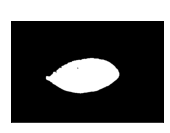

In [14]:
#eighth folder

n1 = os.listdir('_Output/Lemon_(P10)')
alpha = 1.1  # Simple contrast control
beta = 10  # Simple brightness control
kernel = np.ones((5,5),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(1):
    img = cv.imread('_Output/Lemon_(P10)/%s' % n1[i])
    median = cv.medianBlur(img, 5)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):X
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.2
    binary_mask = blurred_image > t

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    
    
    plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    plt.xticks([]), plt.yticks([])
    sift = cv.SIFT_create()
    kp = sift.detect(gray_image,None)
    img=cv.drawKeypoints(gray_image,kp,img)
    cv.imwrite('sift_keypoints.jpg',img)
    print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
    img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
    cv.imwrite('fast_false.png', img3)
    plt.subplot(121), plt.imshow(img3 , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Lemon_(P10)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  


    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    
    
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Lemon_(P10)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    cv.imwrite(writePath, opening*255)
    plt.show()


average=totaljaccard/len(n1)
print(average)


    


In [44]:
#ninth folder


n1 = os.listdir('_Output/Mango_(P0)')
alpha = 1.6  # Simple contrast control
beta = 19  # Simple brightness control
kernel = np.ones((5,5),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(len(n1)):
    img = cv.imread('_Output/Mango_(P0)/%s' % n1[i])
    median = cv.medianBlur(img, 3)#removing the affect of the salt and papier
    iblur=cv.GaussianBlur(median,(3,3),cv.BORDER_DEFAULT)
    new_image = np.zeros(iblur.shape, iblur.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=2.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.18
    binary_mask = blurred_image > t

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    
    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Mango_(P0)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Mango_(P0)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()

average=totaljaccard/len(n1)
print(average) 

0.2909742092252637


In [46]:

#ten folder



n1 = os.listdir('_Output/Pomegranate_(P9)')
alpha = 1.2  # Simple contrast control
beta = 20  # Simple brightness control
kernel = np.ones((5,5),np.uint8) #the kernel which is in the openning operation
# try:
#     alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#     beta = int(input('* Enter the beta value [0-100]: '))
# except ValueError:
#     print('Error, not a number') 

totaljaccard=0
for i in range(len(n1)):
    img = cv.imread('_Output/Pomegranate_(P9)/%s' % n1[i])
    median = cv.medianBlur(img, 5)#removing the affect of the salt and papier
    new_image = np.zeros(img.shape, img.dtype)      #create a new image with the same shape and type of the original image
    new_image = cv.addWeighted(median, alpha, new_image, 0, beta)       #change the original image contrast and brightness and put it in the new image 
    ################################################################################
    #############################problem of high complexity########################
    ############################################################################||
    # for y in range(img.shape[0]):
    #     for x in range(img.shape[1]):
    #         for c in range(img.shape[2]):
    #             new_image[y,x,c] = np.clip(alpha*median[y,x,c] + beta, 0, 255)
    ###########################################################################
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(new_image)      # the new image with a grayscale 
    # blur the image to denoise
    blurred_image = skimage.filters.gaussian(gray_image, sigma=3.0)     #bluring the glay image 

    #the tresholding and make the segmantaion processes
    t = 0.2
    binary_mask = blurred_image > t

   
    #make a openning shape to get smoothed edges
    c = binary_mask.astype('uint8')
    #the openning to make the segmantation better
    opening = np.zeros(binary_mask.shape, binary_mask.dtype)
    opening = cv.morphologyEx(c, cv.MORPH_OPEN, kernel)
    
    # plt.subplot(121), plt.imshow(opening , cmap='gray'), plt.title('binary_mask-my-work',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])
    img_truth = cv.imread('_GroundTruth/Pomegranate_(P9)/%s' % n1[i])
    # the new image with a grayscale 
    gray_image_truth = skimage.color.rgb2gray(img_truth)  
    # blur the image to denoise
    blurred_image_truth = skimage.filters.gaussian(gray_image_truth, sigma=1.0) 
    
    binary_mask_truth = blurred_image_truth > t 
    
    # plt.subplot(122), plt.imshow(binary_mask_truth,cmap='gray'), plt.title('binary_mask_truth',fontsize=10,color='w')
    # plt.xticks([]), plt.yticks([])  
    img_true=np.array(binary_mask).ravel()
    img_pred=np.array(binary_mask_truth).ravel()
    iou = jaccard_score(img_true, img_pred)
    totaljaccard+=iou
    # print(iou)
    writePath= 'A:\Aastsource\Term-8\image processing\project\work\myWork\Pomegranate_(P9)\\'+str(i+1)+'.jpg';
  


    ###############################Out Put#############################
    
    # cv.imwrite(writePath, opening*255)
    plt.show()

average=totaljaccard/len(n1)
print(average)


0.40034940063829044
